In [1]:
# Importing libraries
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import pandas as pd
import seaborn as sns
  
# Data Visualization
import matplotlib.pyplot as plt
  
# Importing Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
  
# Initializing Plotly
pio.renderers.default = 'colab'

In [2]:
#loading datasets
dataset1=pd.read_csv('covid.csv')
dataset2=pd.read_csv('covid_grouped.csv')
dataset3=pd.read_csv('coviddeath.csv')

In [3]:
#understanding the data
dataset1.head() #shows first 5 rows

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF


In [4]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
 16  iso_alpha         209 non-null    object 
dt

In [5]:
dataset1.shape # Returns tuple of shape (Rows, columns)

(209, 17)

In [6]:
dataset1.size # Returns size of dataframe

3553

In [7]:
dataset1.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'iso_alpha'],
      dtype='object')

In [8]:
# Drop NewCases, NewDeaths, NewRecovered rows from dataset1 because of Null values 
  
dataset1.drop(['NewCases', 'NewDeaths', 'NewRecovered'], 
              axis=1, inplace=True)
  
# Select random set of values from dataset1
dataset1.sample(5)

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
78,Sudan,Africa,43943536.0,11780,763.0,6194.0,4823.0,NaN,268.0,17.0,401.0,9.0,EasternMediterranean,SDN
33,Dominican Republic,North America,10858648.0,76536,1246.0,40539.0,34751.0,317.0,7048.0,115.0,281926.0,25963.0,Americas,DOM
149,Chad,Africa,16467965.0,942,76.0,838.0,28.0,NaN,57.0,5.0,NaN,NaN,Africa,TCD
134,Angola,Africa,32956300.0,1483,64.0,520.0,899.0,20.0,45.0,2.0,64747.0,1965.0,Africa,AGO
71,Ivory Coast,Africa,26437950.0,16447,103.0,12484.0,3860.0,NaN,622.0,4.0,104584.0,3956.0,Africa,


In [9]:
dataset2.size

386716

In [10]:
dataset2.shape

(35156, 11)

In [11]:
dataset2.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region', 'iso_alpha'],
      dtype='object')

In [12]:
dataset2.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,iso_alpha
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,AFG
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,ALB
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,DZA
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,AND
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,AGO


In [13]:
dataset3.head()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
0,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,122.0,NaN
1,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,596.0,NaN
2,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,1521.0,NaN
3,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,4186.0,NaN
4,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,10014.0,NaN


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Russia'),
  Text(4, 0, 'South Africa'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'Peru'),
  Text(7, 0, 'Chile'),
  Text(8, 0, 'Colombia'),
  Text(9, 0, 'Spain')])

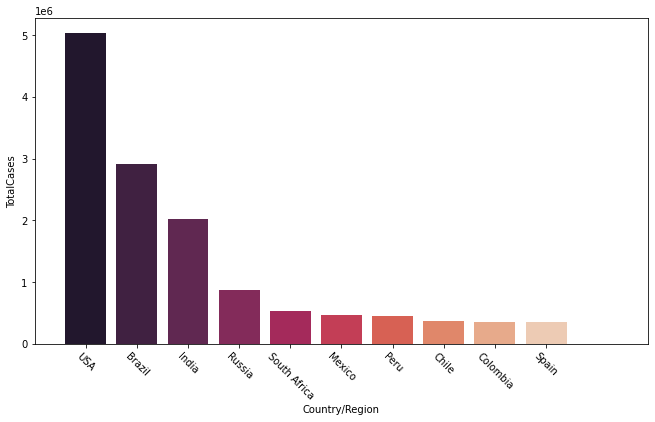

In [14]:
plt.figure(figsize=(11,6))
# Categorical Plot
g = sns.barplot(x='Country/Region', 
                   y='TotalCases', 
                   data=dataset1.head(10), 
                   palette="rocket"
                )


plt.xlim(-1,11)
 
# Rotate x-labels
plt.xticks(rotation=-45)


In [15]:
#- Comparisons between top 10 COVID infected countries in terms of total cases, total deaths, total recovered & total tests

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

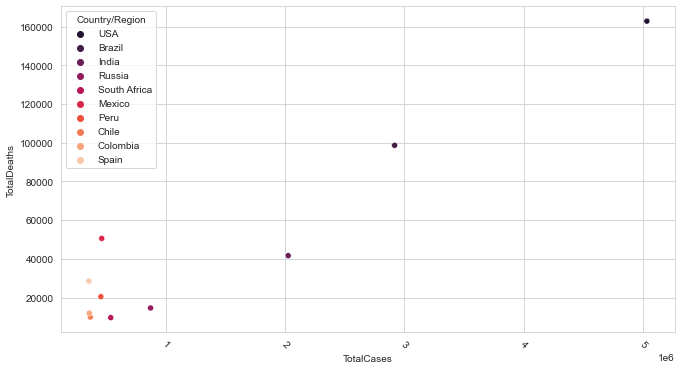

In [16]:
# Set theme
sns.set_style('whitegrid')
plt.figure(figsize=(11,6)) # Set plot dimensions

# Categorical Plot
g = sns.scatterplot(x='TotalCases', 
                   y='TotalDeaths', 
                   data=dataset1.head(10),
                   hue='Country/Region',
                   palette="rocket"
                )



 
# Rotate x-labels
plt.xticks(rotation=-45)

In [17]:
dataset1.columns = dataset1.columns.str.replace('Country/Region', 'Country')
top10=dataset1.head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'South Africa'),
  Text(6, 0, 'Peru'),
  Text(7, 0, 'Colombia'),
  Text(8, 0, 'Chile'),
  Text(9, 0, 'Mexico')])

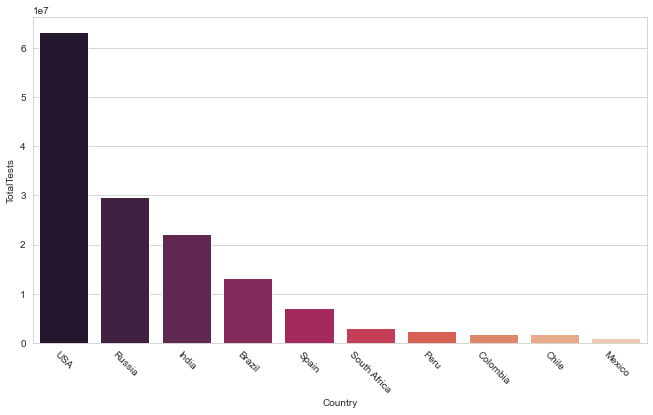

In [18]:
plt.figure(figsize=(11,6))
# Categorical Plot
g = sns.barplot(x='Country', 
                   y='TotalTests', 
                   data=top10,
                  order=top10.sort_values('TotalTests',ascending = False).Country,
                   palette="rocket"
                )


 
# Rotate x-labels
plt.xticks(rotation=-45)

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

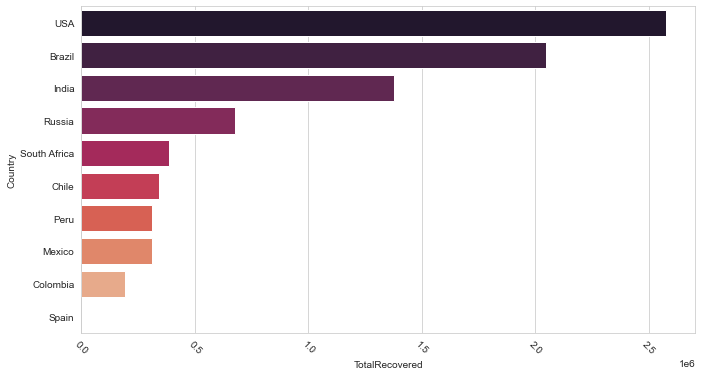

In [19]:
plt.figure(figsize=(11,6))
# Categorical Plot
g = sns.barplot(x='TotalRecovered', 
                   y='Country', 
                   data=top10,
                   order=top10.sort_values('TotalRecovered',ascending = False).Country,
                   palette="rocket"
                )


 
# Rotate x-labels
plt.xticks(rotation=-45)

(90.0, 190.0)

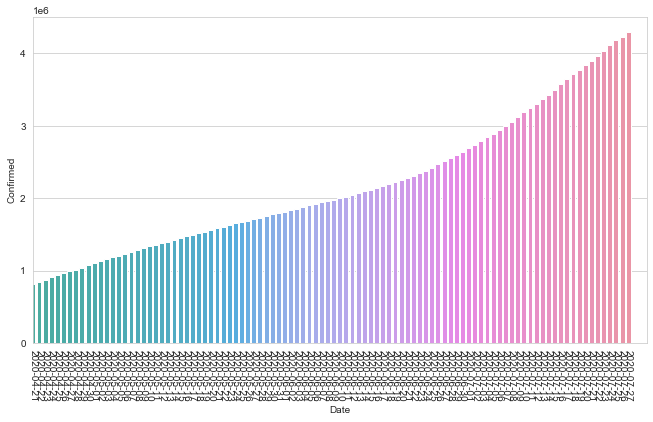

In [60]:

#Countries Specific COVID Data Visualization: (United States)
plt.figure(figsize=(11,6))
df_US= dataset2.loc[dataset2["Country/Region"]=="US"]

sns.barplot(x="Date", y="Confirmed",data=df_US)
# Rotate x-labels
plt.xticks(rotation=-90)
plt.xlim(90,190)


(90.0, 190.0)

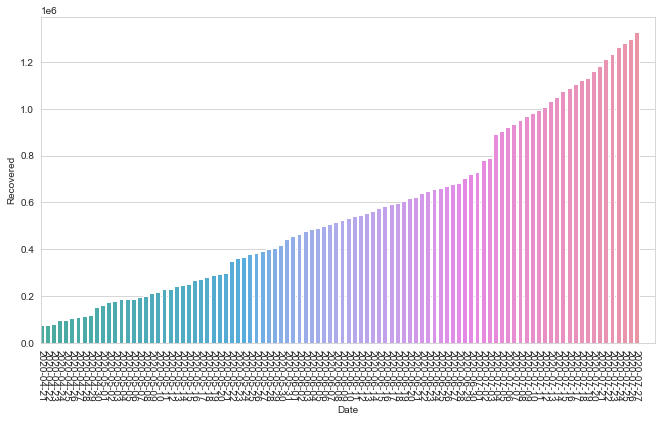

In [63]:
plt.figure(figsize=(11,6))
           
sns.barplot(x="Date", y="Recovered",data=df_US)
# Rotate x-labels
plt.xticks(rotation=-90)
plt.xlim(90,190)


(90.0, 190.0)

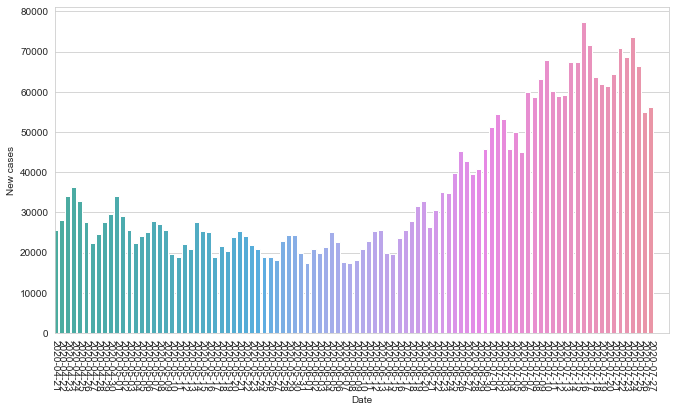

In [65]:
plt.figure(figsize=(11,6))
           
sns.barplot(x="Date", y="New cases",data=df_US)
# Rotate x-labels
plt.xticks(rotation=-90)
plt.xlim(90,190)

In [66]:
#Conclusions
#1.Mexico had very high deaths compared to covid cases
#2.India and Brazil had more number of cases than Russia but less Testing than Russia
#3.Mexico had the lowest testing in top 10 highest cases countries and ranked 6th in total no of cases 
